#### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/full_data.csv')

#### Data analysis

In [3]:
df.columns

Index(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10',
       ...
       'Zimag42', 'Zimag43', 'Zimag44', 'Zimag45', 'Zimag46', 'Zimag47',
       'Zimag48', 'Zimag49', 'Zimag50', 'Concentration'],
      dtype='object', length=101)

In [4]:
dic = {}

for c in list(df['Concentration']):

    if c not in dic:
        dic[c] = 1
    else:
        dic[c] += 1

In [5]:
dic

{0.01: 4, 0.05: 4, 0.1: 4, 0.5: 4, 1.0: 4, 5.0: 4, 10.0: 4, 50.0: 4}

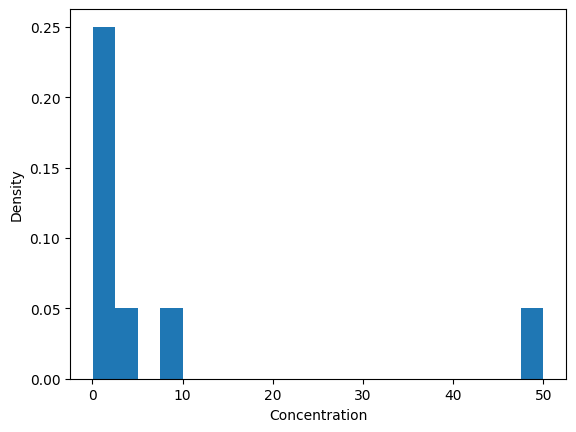

In [6]:
plt.hist(df['Concentration'],bins=20,density=True)
plt.xlabel('Concentration'),plt.ylabel('Density')
plt.show()

In [127]:
# df = pd.read_csv('data/full_data.csv')

df_filtered = df[df.Concentration < 10]

In [125]:
df = pd.read_csv('data/full_data.csv')

scaler = MinMaxScaler()
colunas = df.columns[:-1]

df_normalizado = pd.DataFrame(scaler.fit_transform(df[colunas]), columns=colunas)
df_normalizado['Concentration'] = df['Concentration']

df = df_normalizado.copy()

# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df_filtered = df[df.Concentration < 10]

#### Model training

In [5]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [6]:
def r_quadrado_sem_intercepto(y_real, y_predito):
    return 1 - (np.sum((y_real - y_predito) ** 2) / np.sum(y_real**2))

In [64]:
df = pd.read_csv('data/full_data.csv')

In [65]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

##### Fit Regularizado

In [66]:
import statsmodels.api as sm

In [69]:
modelo = sm.OLS(y, X)

resultado = modelo.fit_regularized(
    alpha=1,
    refit=True,
)

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          Concentration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                -3.117e+24
Date:                Tue, 10 Sep 2024   Prob (F-statistic):                nan
Time:                        09:38:35   Log-Likelihood:                 776.25
No. Observations:                  32   AIC:                            -1390.
Df Residuals:                     -48   BIC:                            -1272.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1             0.0102        nan        nan        n

c:\venv\ilumpy\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
c:\venv\ilumpy\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\venv\ilumpy\lib\site-packages\statsmodels\regression\linear_model.py:1854: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


##### Unfiltered

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [21]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

35.29489742610859


R^2: -0.9734


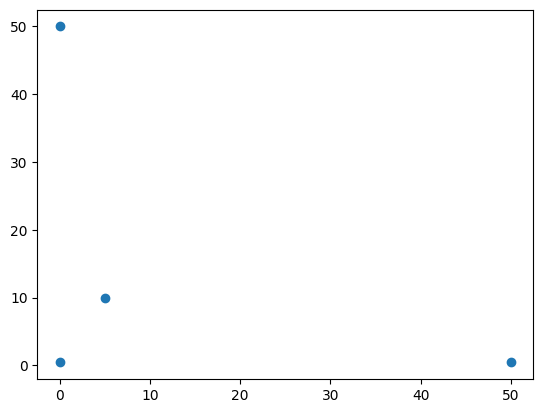

In [22]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')
plt.scatter(y_test, preditos)

In [23]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [24]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=True))

1231.3006500000001


R^2: -0.9506


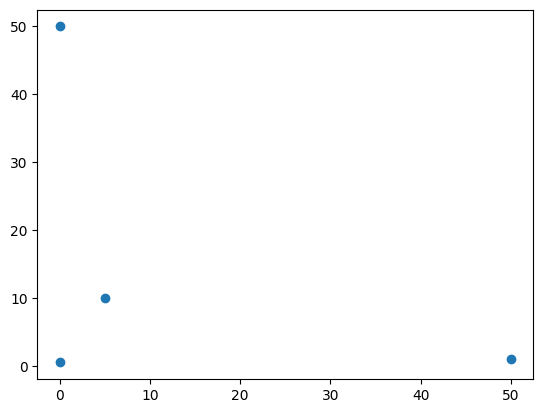

In [25]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')
plt.scatter(y_test, preditos)

##### Concentration in log

In [26]:
# df = pd.read_csv('data/full_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

y_log = np.log10(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [44]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [45]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

1.568963507297314


R^2: -0.0933


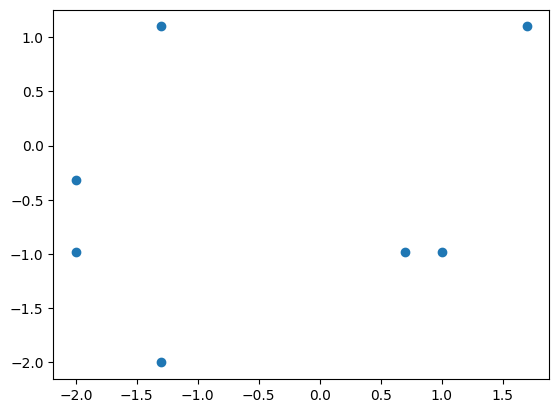

In [46]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')
plt.scatter(y_test, preditos)

In [47]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [48]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

1.7909732107531162


In [49]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')

R^2: -0.4247


##### Filtered

In [128]:
X_filtered = df_filtered.iloc[:,:-1]
y_filtered = df_filtered.iloc[:,-1]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [135]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [136]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

0.5991017968283545


R^2: 0.931


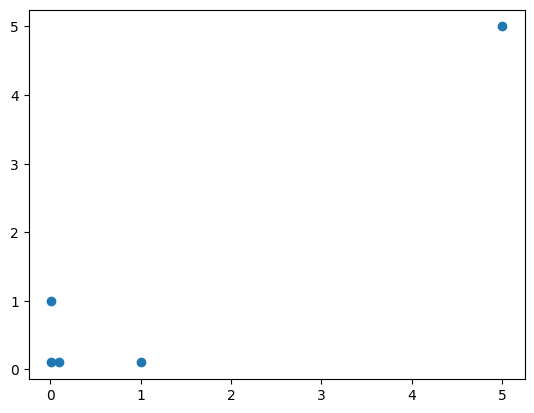

In [137]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')
plt.scatter(y_test, preditos)

In [138]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [139]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=True))

0.37733999999999995


R^2: 0.9275


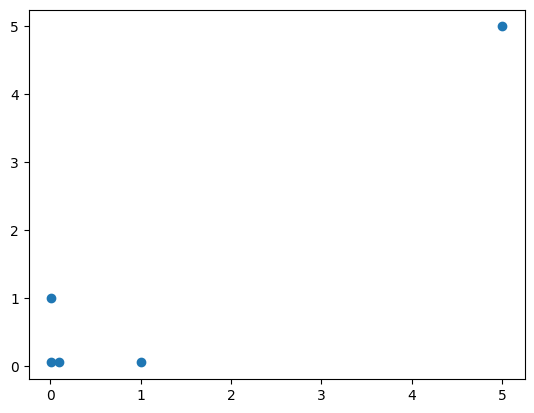

In [140]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')
plt.scatter(y_test, preditos)

##### Visualization

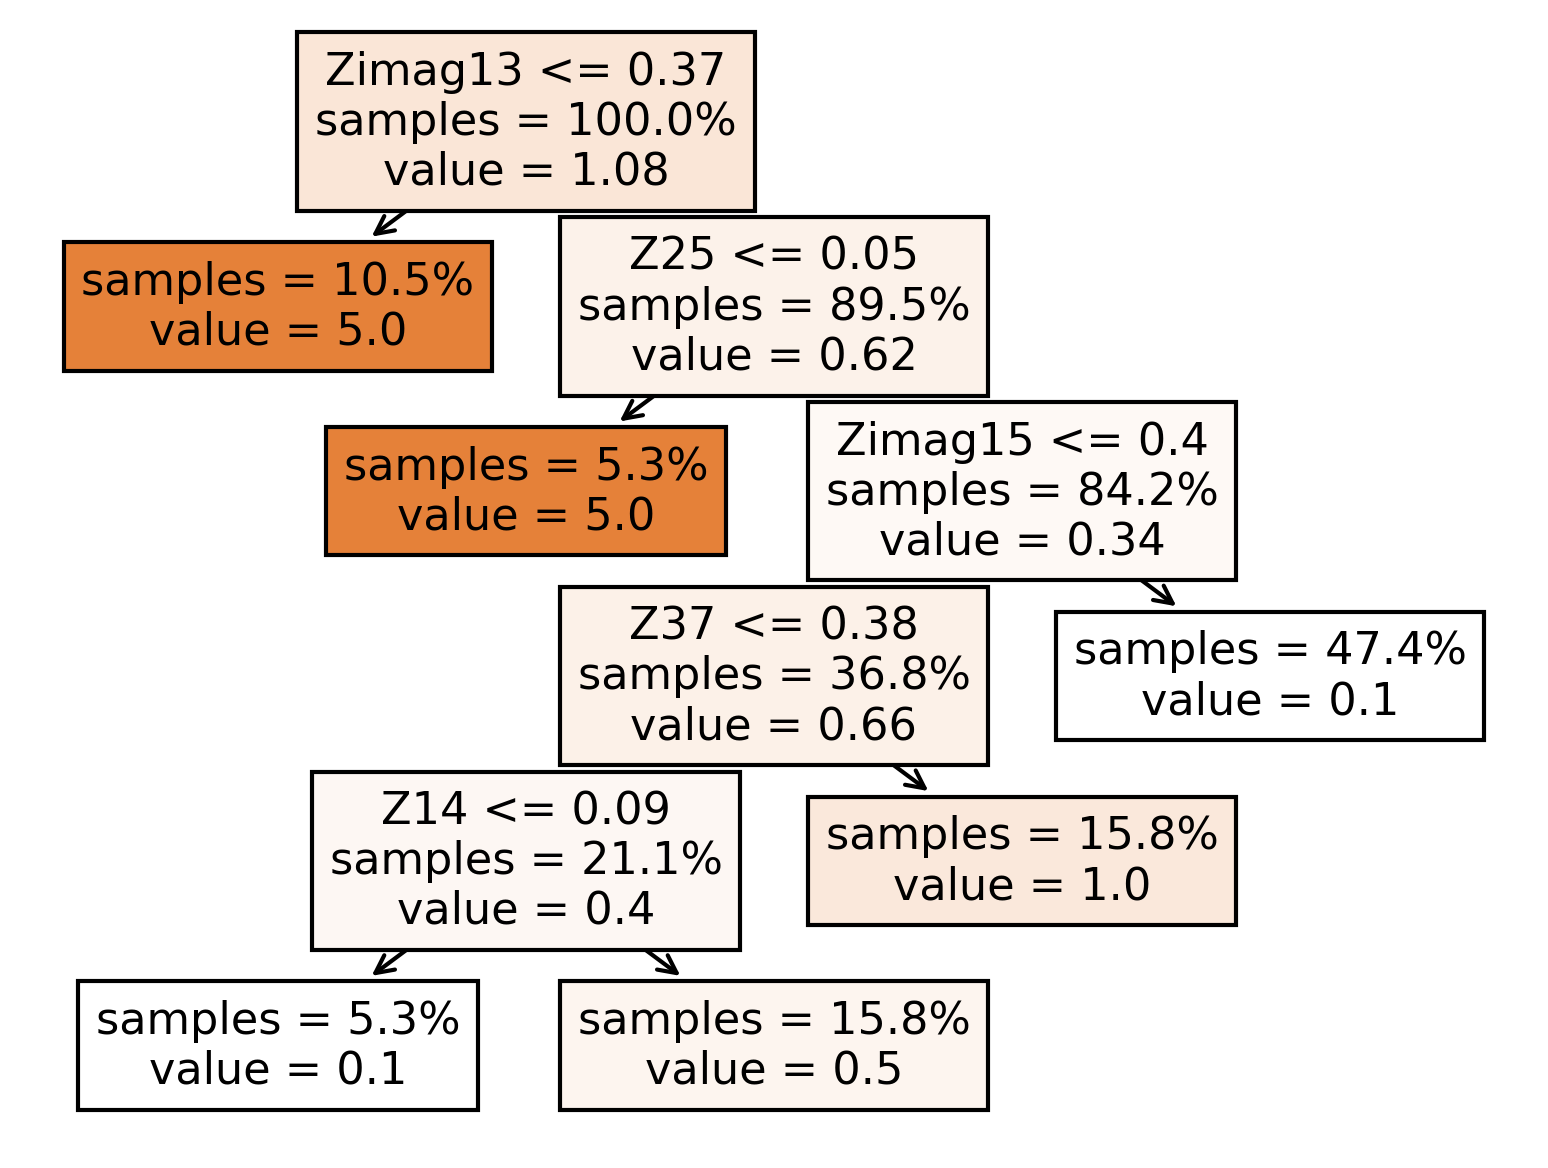

In [141]:
figura, eixo = plt.subplots(dpi=300)

plot_tree(
    modelo_simples,
    feature_names=X_filtered.columns,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

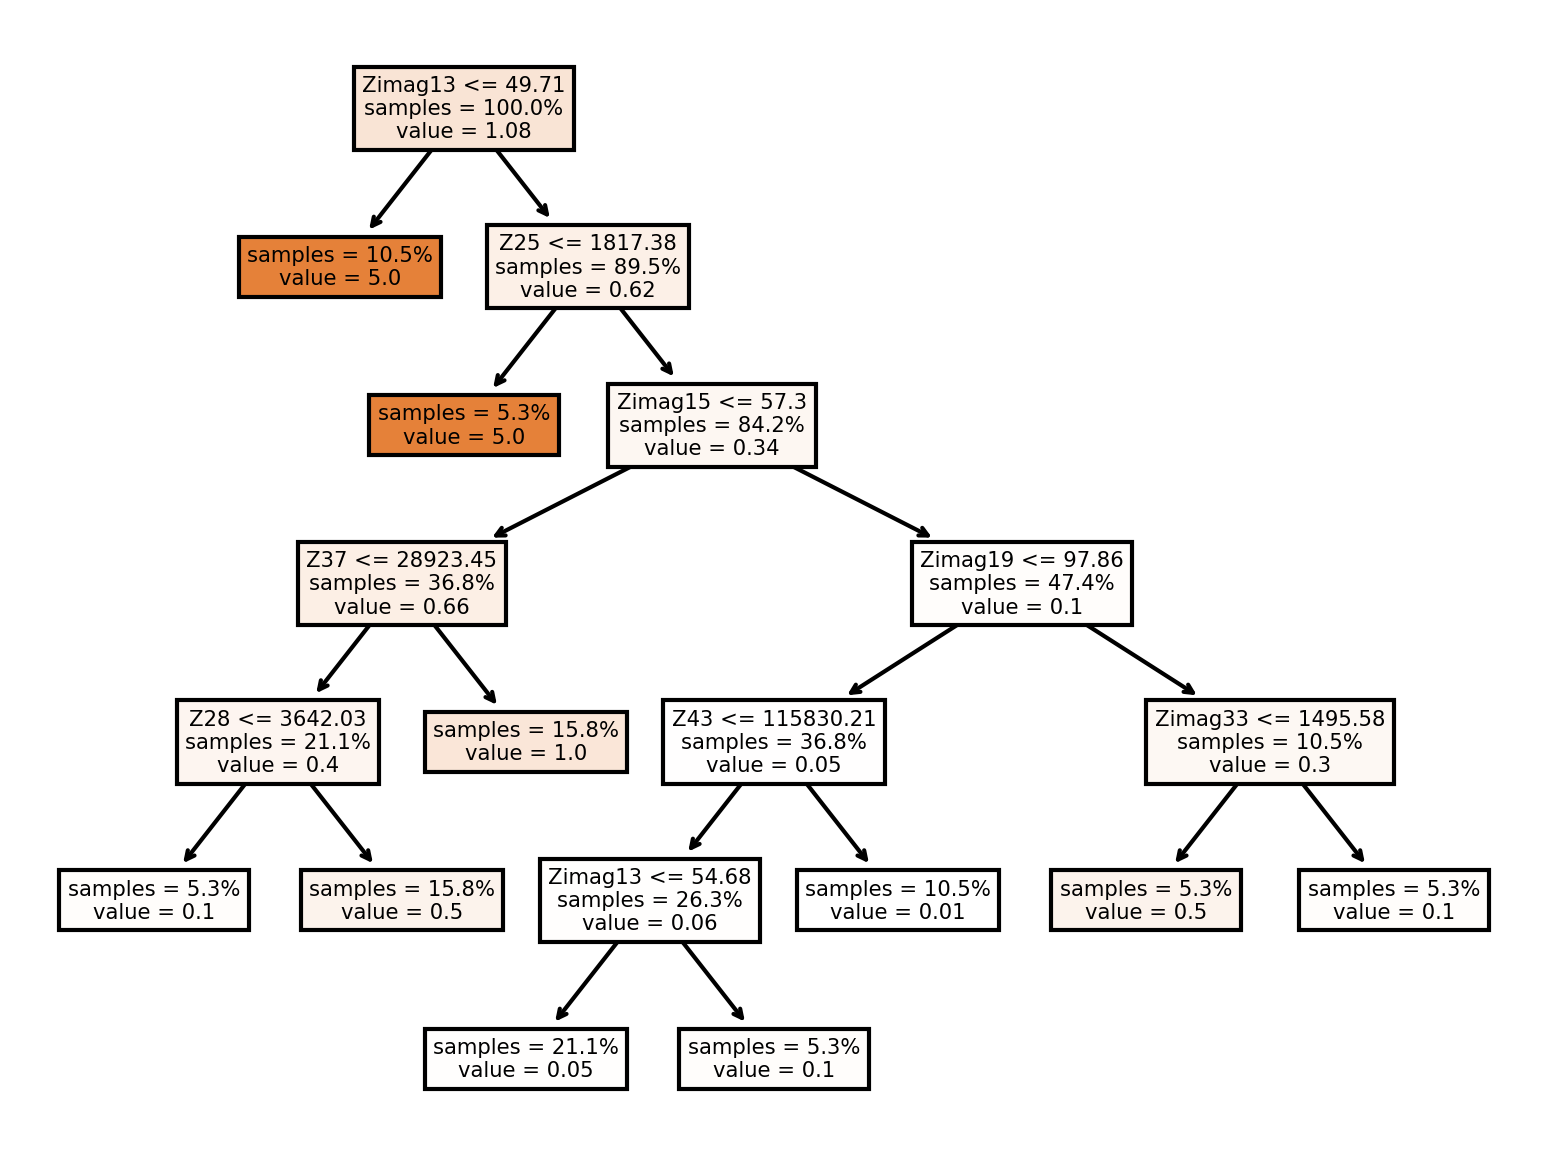

In [59]:
figura, eixo = plt.subplots(dpi=300)

plot_tree(
    modelo_complexo,
    feature_names=X.columns,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

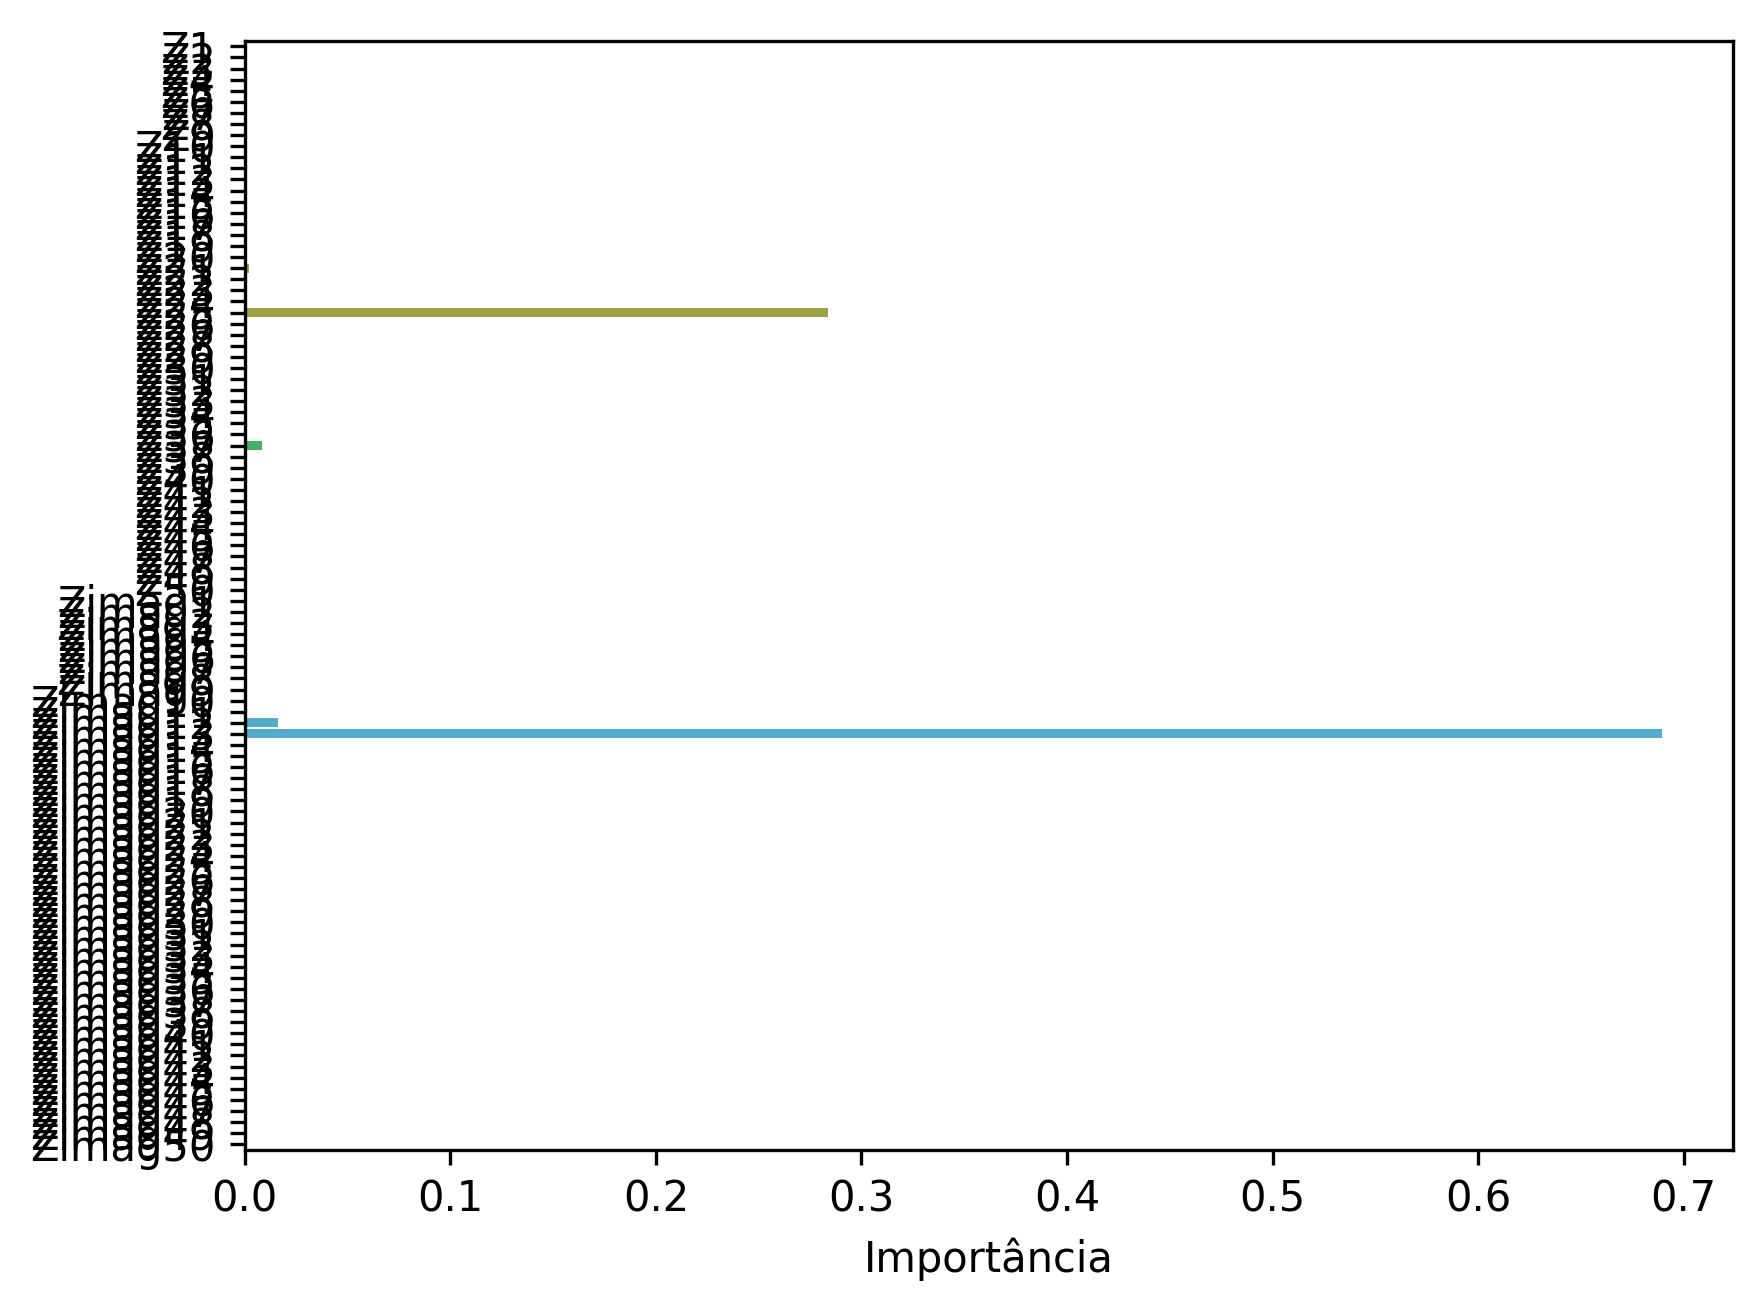

In [31]:
atributos = X.columns
importancias = modelo_simples.feature_importances_

figura, eixo = plt.subplots(dpi=300)

eixo = sns.barplot(x=importancias, y=atributos)
eixo.set_xlabel("Importância");

In [32]:
for i,importancia in enumerate(importancias):
    if importancia > 0:
        print(atributos[i],importancia)

Z21 0.0020713141219039733
Z25 0.28388002342821456
Z37 0.008275719923936211
Zimag12 0.016350028485995424
Zimag13 0.6894229140399499


#### Plot Relação

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

In [80]:
atributos_numericos = list(df.columns)[:-1]

In [94]:
CONFIGURACAO_BASE = {
    "n_jobs": 4,
    "random_state": 0,
}

In [81]:
preprocessador_mlp = ColumnTransformer(
    transformers=[
        ("num", QuantileTransformer(n_quantiles=100), atributos_numericos),
        # ("cat", OneHotEncoder(handle_unknown="ignore"), atributos_categoricos),
    ],
    sparse_threshold=0,
)

In [84]:
modelo_mlp = MLPRegressor(
    hidden_layer_sizes=(30, 15),
    learning_rate_init=0.01,
    early_stopping=True,
    random_state=0,
)

In [88]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [89]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state=42)

In [90]:
modelo = make_pipeline(
    preprocessador_mlp,
    modelo_mlp,
)

modelo.fit(X_treino, y_treino)


def r_quadrado_sem_intercepto(y_real, y_predito):
    return 1 - (np.sum((y_real - y_predito) ** 2) / np.sum(y_real**2))


print(
    "R^2 da regressão:",
    r_quadrado_sem_intercepto(y_teste, modelo.predict(X_teste)),
)

R^2 da regressão: 0.10646042119494592


c:\venv\ilumpy\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (100) is greater than the total number of samples (28). n_quantiles is set to n_samples.
  warnings.warn(


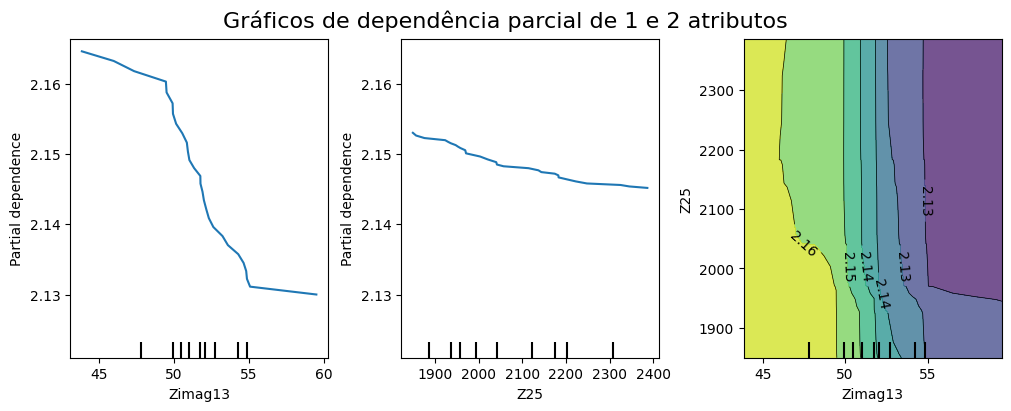

In [95]:
# Z21 0.0020713141219039733
# Z25 0.28388002342821456
# Z37 0.008275719923936211
# Zimag12 0.016350028485995424
# Zimag13 0.6894229140399499

INFORMACAO_ATRIBUTOS = {
    "features": ["Zimag13", "Z25", ("Zimag13", "Z25")],
    "kind": "average",
}

figura, eixo = plt.subplots(
    ncols=3,
    figsize=(10, 4),
    constrained_layout=True,
)

PartialDependenceDisplay.from_estimator(
    modelo,
    X_treino,
    ax=eixo,
    **INFORMACAO_ATRIBUTOS,
    **CONFIGURACAO_BASE,
)

figura.suptitle(
    "Gráficos de dependência parcial de 1 e 2 atributos", fontsize=16
);